In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from IPython.utils import io

In [11]:
with io.capture_output() as captured:
    %run EDA.ipynb

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

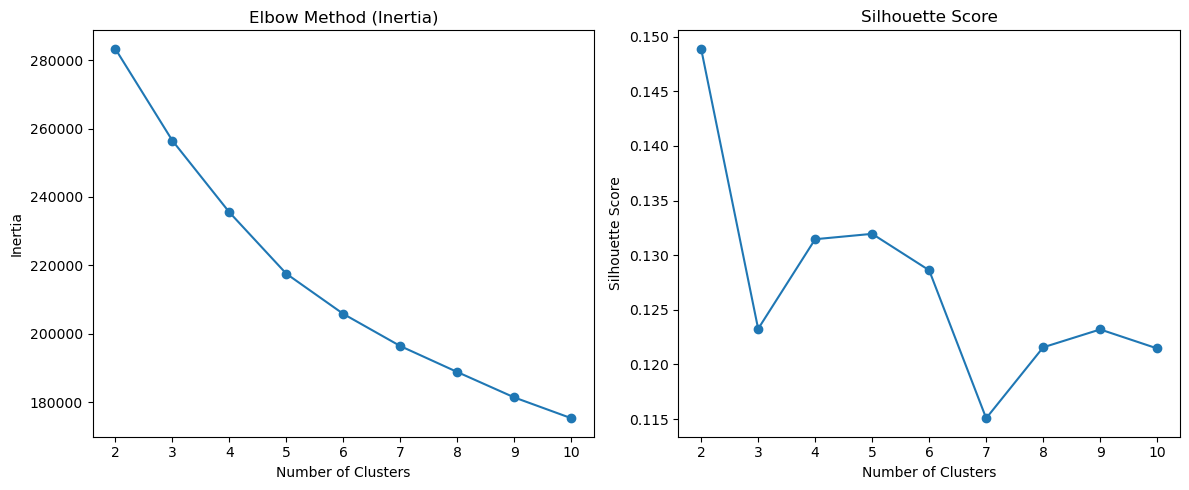

In [14]:
continuous_features = [
    'danceability', 'energy', 'valence', 'tempo',
    'log_speechiness', 'log_acousticness', 'log_instrumentalness',
    'log_liveness', 'log_duration_ms', 'log_loudness'
]

# tandardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_final[continuous_features])

# Determine Optimal Number of Clusters 
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method (Inertia)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


based on both plots, 5 seems to be the optimal number of clusters. THere is a noticable bending point around point 5, and there is 

In [15]:
optimal_k = 5
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_final.fit(X_scaled)
df_final['cluster'] = kmeans_final.labels_

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/tmp/ipykernel_154/1913180496.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['cluster'] = kmeans_final.labels_


In [17]:
cluster_summary = df_final.groupby('cluster')[continuous_features].mean()
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
         danceability    energy   valence       tempo  log_speechiness  \
cluster                                                                  
0            0.602673  0.439082  0.385855  112.697291         0.066004   
1            0.726770  0.666074  0.550379  122.058386         0.262741   
2            0.544143  0.809990  0.395311  132.097052         0.070911   
3            0.735937  0.725667  0.676032  114.129279         0.068674   
4            0.659376  0.787950  0.387754  125.299461         0.067891   

         log_acousticness  log_instrumentalness  log_liveness  \
cluster                                                         
0                0.383008              0.064283      0.141812   
1                0.157759              0.008792      0.176246   
2                0.056269              0.019306      0.210899   
3                0.122117              0.011832      0.138870   
4                0.060533              0.536168      0.167022   

        

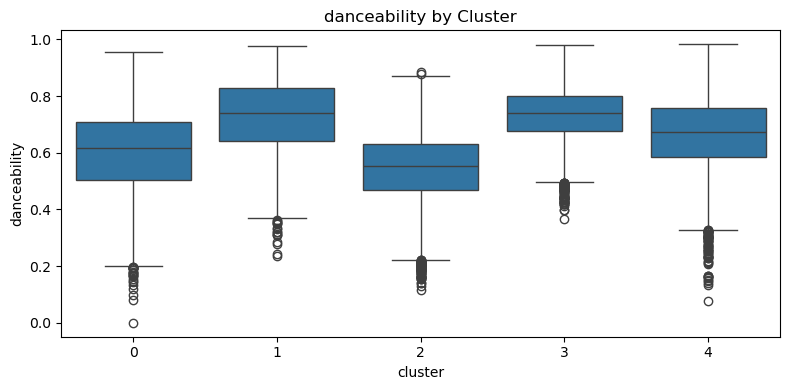

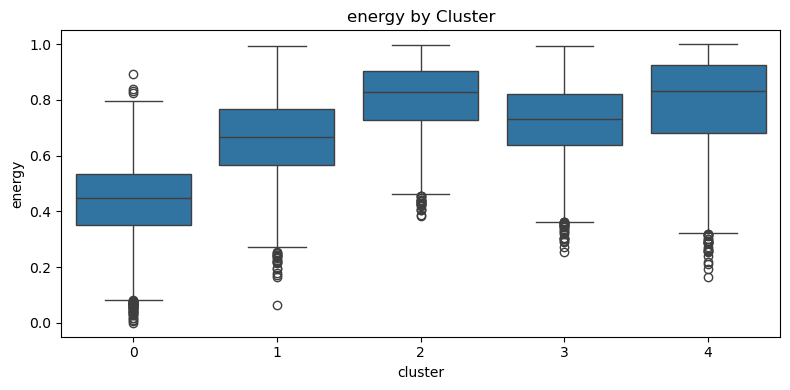

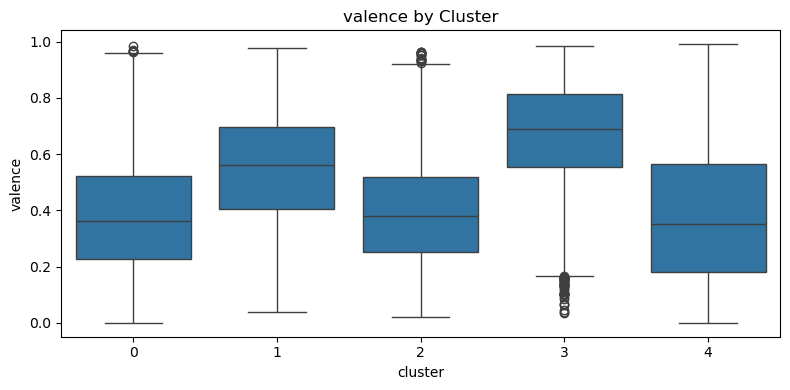

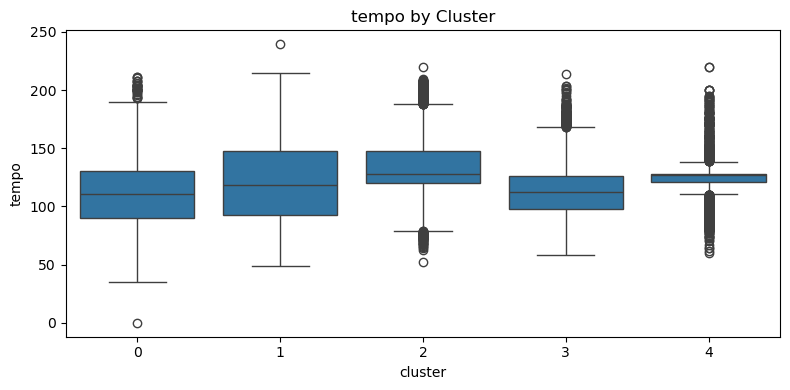

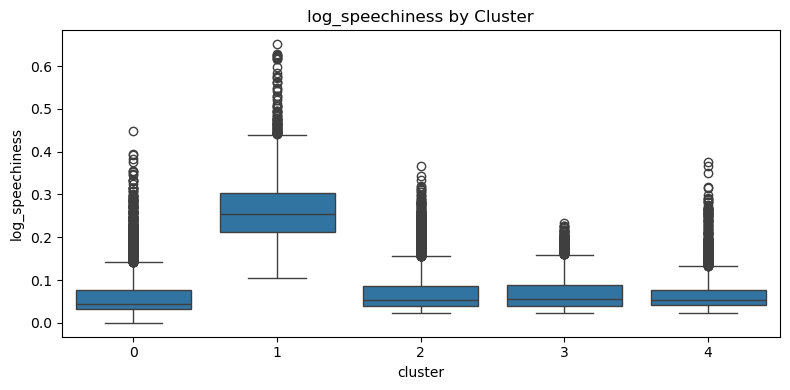

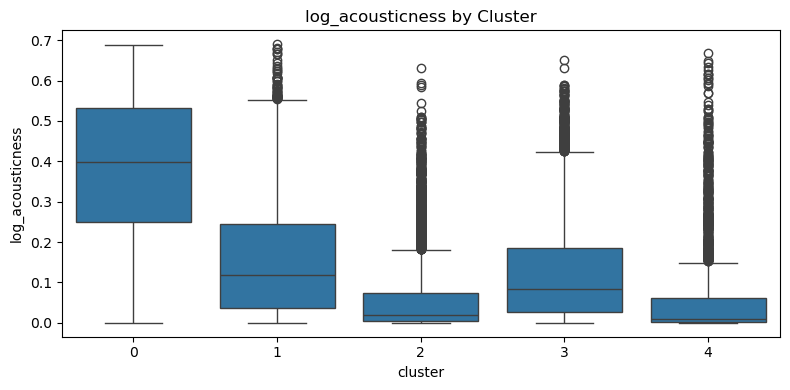

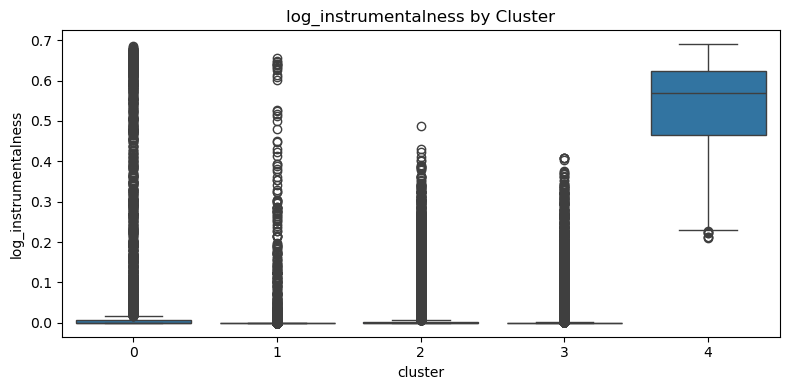

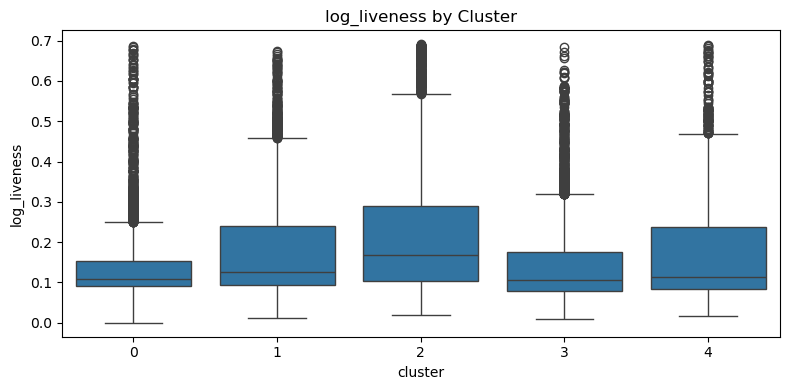

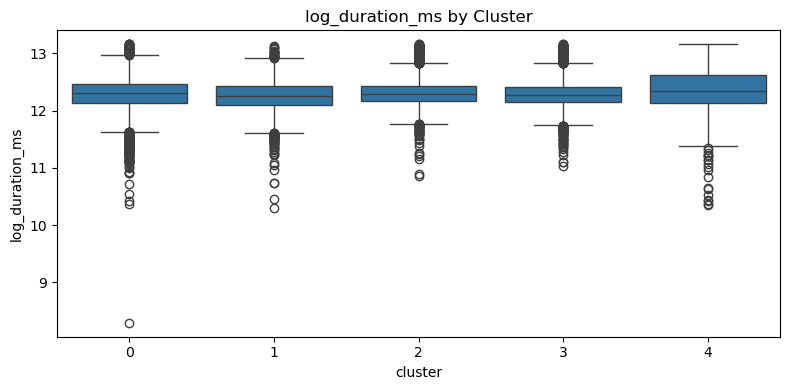

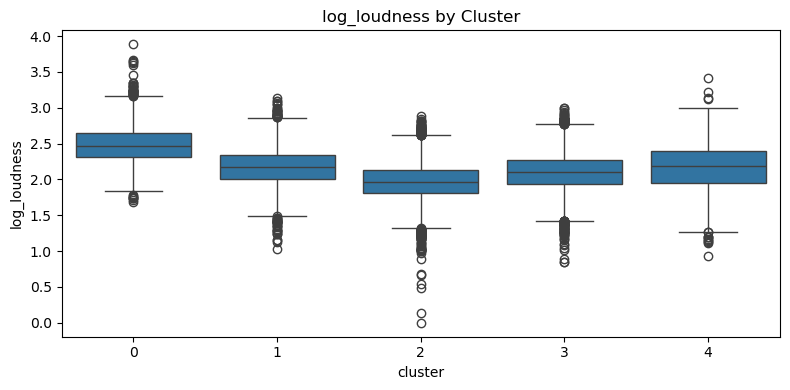

/tmp/ipykernel_154/866597543.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['PCA1'] = X_pca[:, 0]
/tmp/ipykernel_154/866597543.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['PCA2'] = X_pca[:, 1]


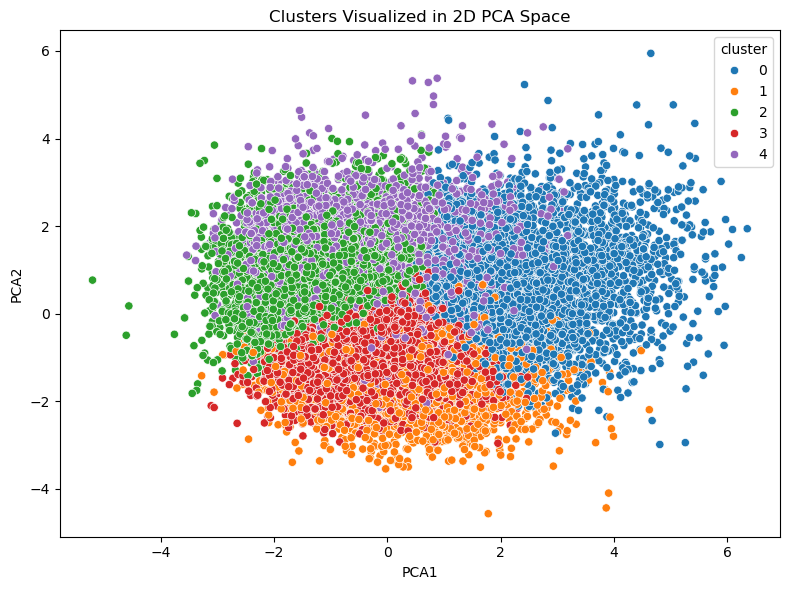

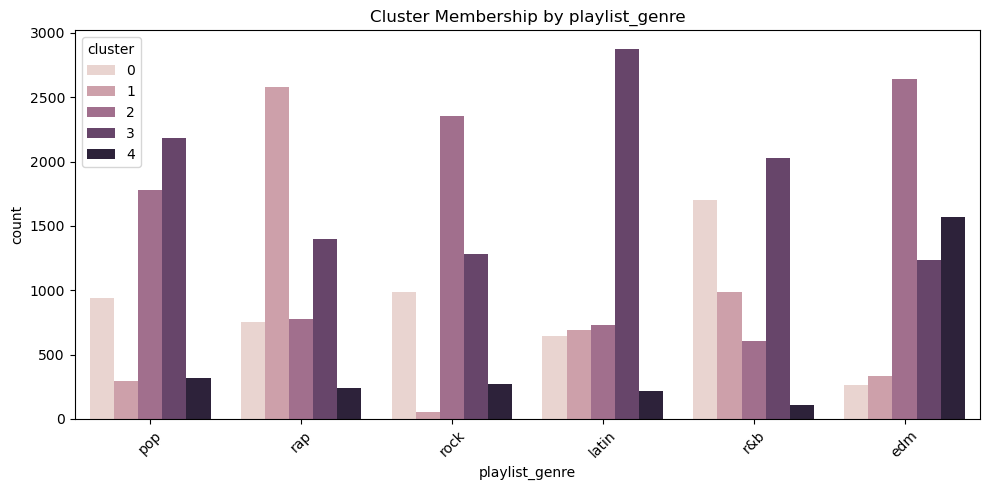

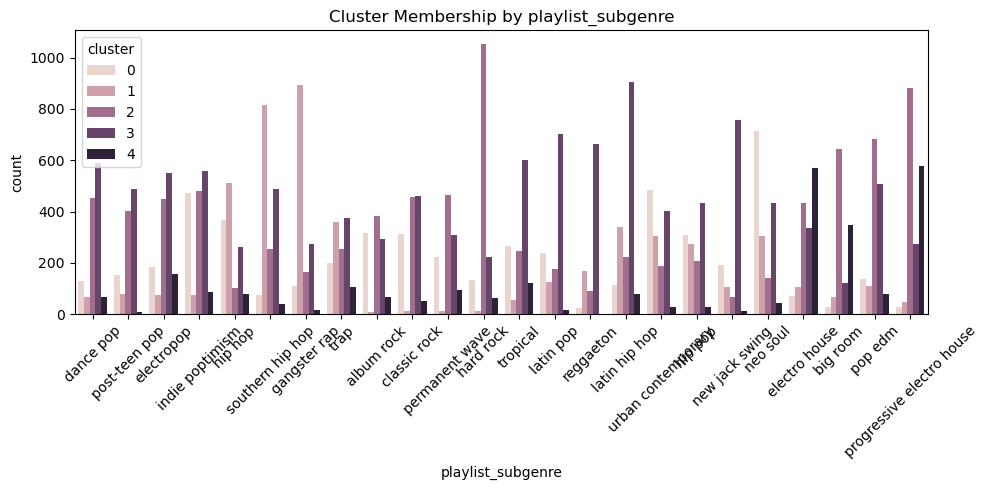

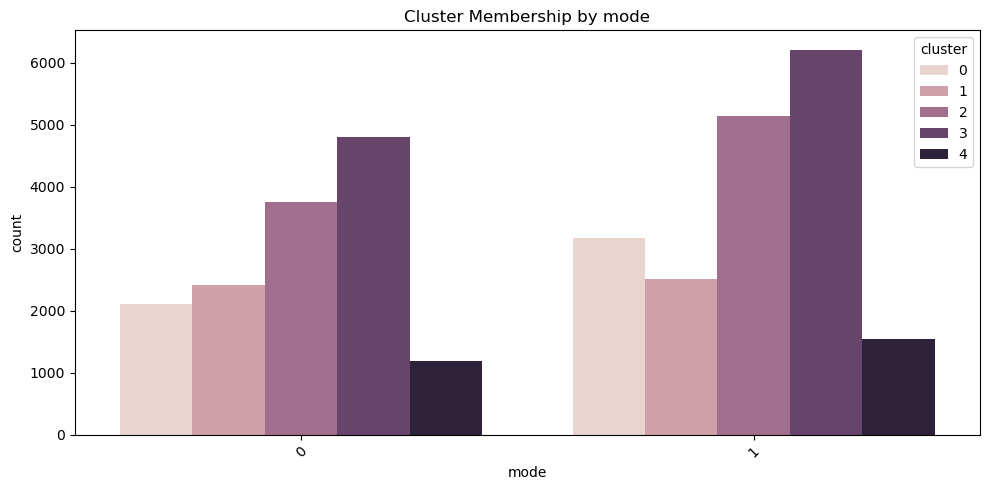

In [18]:
# Boxplots for clusters
for feature in continuous_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='cluster', y=feature, data=df_final)
    plt.title(f'{feature} by Cluster')
    plt.tight_layout()
    plt.show()

# PCA for 2D cluster visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_final['PCA1'] = X_pca[:, 0]
df_final['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df_final, palette='tab10')
plt.title('Clusters Visualized in 2D PCA Space')
plt.tight_layout()
plt.show()

# Optional: Compare cluster distribution across categorical features
for col in ['playlist_genre', 'playlist_subgenre', 'mode']:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, hue='cluster', data=df_final)
    plt.title(f'Cluster Membership by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Cluster Differences in Musical Features

- Danceability
Clusters 1 and 3 have the highest median danceability, suggesting they contain rhythmically consistent, dance-friendly tracks.

Cluster 2 is the least danceable, potentially representing tracks with complex or slower rhythms.

- Energy
Clusters 2 and 4 contain high-energy tracks, likely corresponding to genres such as electronic or rock.

Cluster 0 has significantly lower energy, indicating softer, possibly acoustic or ambient music.

- Valence
Cluster 3 shows higher valence, which suggests happier or more positive-sounding music.

Clusters 0 and 2 have lower valence, potentially indicating more melancholic or serious tones.

- Tempo
Clusters 2 and 3 lean toward faster tempos.

Cluster 0 includes slower-paced tracks, possibly ballads or background-style music.

Transformed Audio Feature Interpretation


- log_speechiness
Cluster 1 stands out with higher values, possibly including tracks with spoken word or heavy lyrical content such as rap.

Other clusters have low median values, typical of instrumental or purely melodic music.

- log_acousticness
Cluster 0 has the highest acousticness, which strongly suggests acoustic, folk, or classical influences.

Clusters 2, 3, and 4 are lower, indicating more electronic or produced instrumentation.

- log_instrumentalness
Cluster 4 clearly stands out with high instrumentalness, likely composed of instrumental or ambient tracks.

The remaining clusters are close to zero, indicating they predominantly include vocal tracks.

- log_liveness
Cluster 2 has slightly higher liveness, potentially capturing more live performances or tracks with ambient noise.

Other clusters show modest or uniform values, suggesting primarily studio-recorded content.

- log_duration_ms
All clusters have relatively similar track durations. Cluster 4 shows slightly longer durations on average, but this is not a major point of separation.

- log_loudness
Cluster 0 has the lowest loudness, aligning with its acoustic/ambient characteristics.

Cluster 4 is the loudest, aligning with its high energy and instrumental intensity.



1. 2D PCA Cluster Visualization

The PCA plot shows a reasonable separation between the five clusters.

Clusters 0 and 2 appear more compact, while clusters 1, 3, and 4 show more overlap.

Despite some blending at boundaries, the PCA projection indicates that the clusters capture distinct subgroups based on the feature set.

2. Cluster Membership by Playlist Genre

Cluster 1 is dominant in the rap genre, aligning with earlier findings of higher log_speechiness.

Cluster 2 is strongly represented in edm, supporting its high energy and danceability.

Cluster 0 shows balanced representation across pop, rock, and r&b — potentially a more general or mixed cluster.

Cluster 4 dominates latin and r&b, possibly reflecting unique tempo/rhythm patterns in those genres.

Cluster 3 is most represented in rock and pop, consistent with its higher valence and moderate energy.

3. Cluster Membership by Mode (Major/Minor)

Cluster 3 has a strong concentration in mode = 1 (major key), suggesting upbeat or positive tracks.

Cluster 2 is well distributed but slightly skewed toward mode = 1 as well.

Cluster 0 leans toward mode = 1, supporting its classification as balanced or more traditional tracks.

Cluster 1 and Cluster 4 show a tilt toward mode = 0 (minor key), often associated with serious, emotional, or somber tracks — especially notable for the cluster associated with high speechiness (Cluster 1) and instrumental richness (Cluster 4).

Summary Observations

Clustering successfully separates songs based on underlying musical features and reflects meaningful groupings when compared against known genre and tonal labels.

There is good alignment between the clustering results and genre-specific expectations 

The PCA projection confirms that clusters are distinguishable in a lower-dimensional space, though some overlap exists due to the continuous nature of musical features.